In [1]:
import pandas as pd
from auto_ml import Predictor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import category_encoders as ce

/home/rlfo/.local/share/virtualenvs/classifier_automl-HbKVo98X/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/rlfo/.local/share/virtualenvs/classifier_automl-HbKVo98X/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Remover os warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('top50.csv',encoding = "ISO-8859-1")

In [4]:
# Uma idea do top 10 mais popular
mais_popular = data.sort_values(['Popularity'], ascending=False)
mais_popular.head(10)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
10,11,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
14,15,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,101,50,83,-4,12,10,205,10,5,92
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
36,37,Otro Trago,Sech,panamanian pop,176,70,75,-5,11,62,226,14,34,91
21,22,Panini,Lil Nas X,country rap,154,59,70,-6,12,48,115,34,8,91
20,21,Piece Of Your Heart,MEDUZA,pop house,124,74,68,-7,7,63,153,4,3,91
19,20,Truth Hurts,Lizzo,escape room,158,62,72,-3,12,41,173,11,11,91


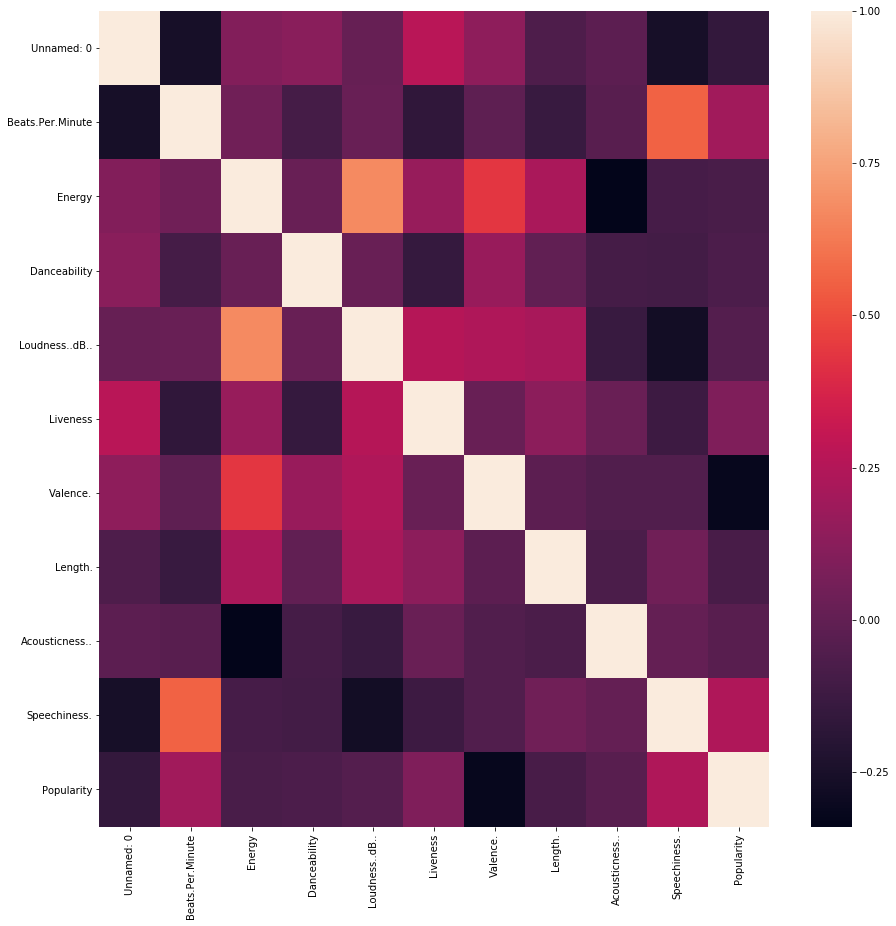

In [5]:
# Uma visão geral da correlação
correlations = data.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlations)

In [6]:
# A correlação é bem baixa, mas vamos seguir
#greater_correlation = correlations.index[abs(correlations['Popularity']) > 0.1]
#sns.heatmap(data[greater_correlation].corr(), annot=True)

In [7]:
#data['Danceable'] = data['Energy'] + data['Danceability'] + data['Liveness'] + data['Beats.Per.Minute']

In [8]:
#data['Danceable'].sample(5)

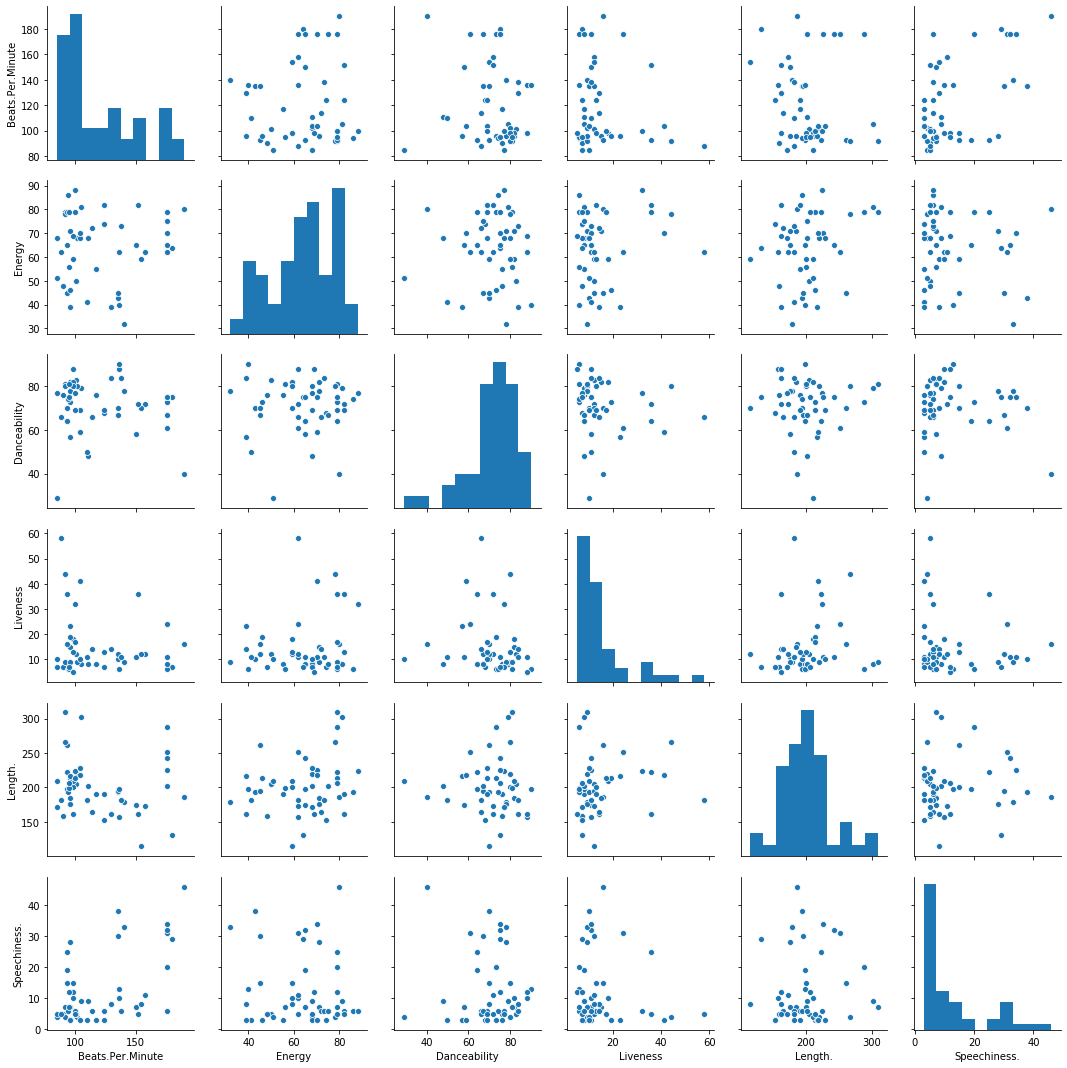

In [9]:
main_features = ['Beats.Per.Minute', 'Energy', 'Danceability', 'Liveness', 'Length.', 'Speechiness.']
sns.pairplot(data[main_features])

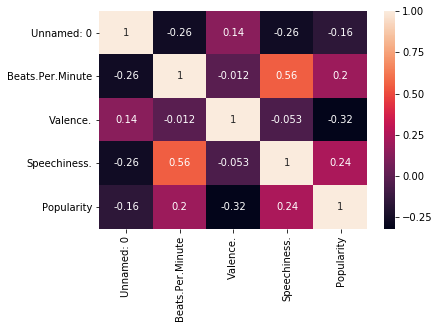

In [10]:
# A correlação é bem baixa, mas vamos seguir
greater_correlation = correlations.index[abs(correlations['Popularity']) > 0.1]
sns.heatmap(data[greater_correlation].corr(), annot=True)

In [11]:
# Deletar três colunas que não nos interessa, o ID, o nome da música, e o nome do artista
data = data.drop(columns=['Unnamed: 0','Track.Name','Artist.Name','Genre'])

In [12]:
data.sample(2)

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
39,95,56,81,-6,6,68,199,48,7,78
9,135,43,70,-11,10,56,194,33,38,95


In [13]:
def colunms_to_description(columns_name, class_column):
    columns_descriptions = {}
    for column in columns_name:
        columns_descriptions[column] = 'categorical'
        
    columns_descriptions[class_column] = 'output' 
    return columns_descriptions
            
    

In [14]:
features = list(data.columns)
features.remove('Popularity')
features

['Beats.Per.Minute',
 'Energy',
 'Danceability',
 'Loudness..dB..',
 'Liveness',
 'Valence.',
 'Length.',
 'Acousticness..',
 'Speechiness.']

In [15]:
X_train,X_test, y_train, y_test = train_test_split(data[features],data['Popularity'], test_size=0.1, random_state=42)

In [16]:
y_train.sample(5)

44    88
19    91
21    91
49    82
12    88
Name: Popularity, dtype: int64

In [17]:
target_enc = ce.LeaveOneOutEncoder(cols=features)

# Fit the encoder using the categorical features and target
target_enc.fit(X_train, y_train)

# Transform the features, rename the columns with _target suffix, and join to dataframe
X_train = X_train.join(target_enc.transform(X_train).add_suffix('_cat'))
X_test = X_test.join(target_enc.transform(X_test).add_suffix('_cat'))

In [18]:
# Deletar três colunas que não nos interessa, o ID, o nome da música, e o nome do artista
X_train = X_train.drop(columns=features)
X_test = X_test.drop(columns=features)

In [19]:
df_train = X_train.join(y_train)
df_test = X_test.join(y_test)

In [20]:
df_train.sample(5)

,Beats.Per.Minute_cat,Energy_cat,Danceability_cat,Loudness..dB.._cat,Liveness_cat,Valence._cat,Length._cat,Acousticness.._cat,Speechiness._cat,Popularity
0,87.711111,87.711111,87.711111,87.000000,87.000000,83.500000,74.500000,83.333333,87.142857,79
34,88.500000,87.711111,89.500000,87.875000,87.711111,87.711111,87.711111,88.500000,84.500000,89
35,87.711111,87.711111,87.711111,88.000000,88.500000,88.000000,87.711111,88.500000,84.500000,89
47,88.500000,85.500000,82.000000,90.000000,87.711111,87.711111,87.711111,88.500000,89.250000,88
25,80.500000,78.500000,82.000000,87.090909,79.500000,87.711111,74.500000,87.711111,84.500000,70


In [21]:
column_descriptions = colunms_to_description(list(df_train.columns),'Popularity')

In [22]:
ml_predictor = Predictor(type_of_estimator='regressor', column_descriptions=column_descriptions)
ml_predictor.train(df_train,model_names=['DeepLearningRegressor'],ml_for_analytics=True)

Welcome to auto_ml! We're about to go through and make sense of your data using machine learning, and give you a production-ready pipeline to get predictions with.

If you have any issues, or new feature ideas, let us know at http://auto.ml
You are running on version 2.9.9
Now using the model training_params that you passed in:
{}
After overwriting our defaults with your values, here are the final params that will be used to initialize the model:
{'epochs': 1000, 'batch_size': 50, 'verbose': 2}
Running basic data cleaning
Performing feature scaling
Fitting DataFrameVectorizer
Now using the model training_params that you passed in:
{}
After overwriting our defaults with your values, here are the final params that will be used to initialize the model:
{'epochs': 1000, 'batch_size': 50, 'verbose': 2}


********************************************************************************************
About to fit the pipeline for the model DeepLearningRegressor to predict Popularity
Started at:


Using TensorFlow backend.


Executing op RandomStandardNormal in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RandomStandardNormal in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Reshape in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Train on 38 samples, validate on 7 samples
Epoch 1/1000
Executing op __inference_keras_scratch_graph_1572 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_keras_scratch_graph_1682 in device /job:localhost/replica:0/task:0/device:CPU:0
 - 0s - loss: 7781.0659 - mean_absolute_error: 88.1320 - mean_absolute_perc

In [23]:
ml_predictor.score(df_test, df_test.Popularity)

None


***********************************************
Advanced scoring metrics for the trained regression model on this particular dataset:

Here is the overall RMSE for these predictions:
8.621412751555086

Here is the average of the predictions:
91.08960418701172

Here is the average actual value on this validation set:
85.6

Here is the median prediction:
89.78456115722656

Here is the median actual value:
87.0

Here is the mean absolute error:
5.920683288574219

Here is the median absolute error (robust to outliers):
2.7845611572265625

Here is the explained variance:
-1.2733026595997967

Here is the R-squared value:
-2.8234957732858357
Count of positive differences (prediction > actual):
4
Count of negative differences:
1
Average positive difference:
7.131429672241211
Average negative difference:
-1.07769775390625


***********************************************




-8.621412751555086

In [24]:
line = df_test.iloc[4]
line

Beats.Per.Minute_cat    87.711111
Energy_cat              87.711111
Danceability_cat        87.711111
Loudness..dB.._cat      87.000000
Liveness_cat            88.750000
Valence._cat            87.711111
Length._cat             87.711111
Acousticness.._cat      87.711111
Speechiness._cat        89.250000
Popularity              91.000000
Name: 17, dtype: float64

In [25]:
predictions = ml_predictor.predict([line])
print(predictions)

93.67131805419922
